In [1]:
import logging
from utils import logging as lg
lg.set_logging(logging.ERROR)



from skimage.measure import block_reduce
import numpy as np

import logging
import pickle
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, font_scale=2, style="whitegrid", palette="muted")
from notebook_utils import plot 


from model import base, provider, heatmap_evaluation
import config

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

%matplotlib inline

In [2]:
from utils import data_provider

In [3]:
dataset_loader = data_provider.DatasetLoader(data_dir='../data')

In [4]:
def plot_heatmaps(_model, dataset, seq):
    if _model == 'shallow':
        model = 's2'
    elif _model == 'deep':
        model = 's3'
    elif _model == 'deepv2':
        model = 'deep_4l'
    elif _model == 'convdeep':
        model = 'convdeep_4l'

    model_path = '.%s' % provider._model_path(model, dataset, seq)
    plot.plot_relevance_methods(model_path, dataset_loader)

# Architectures
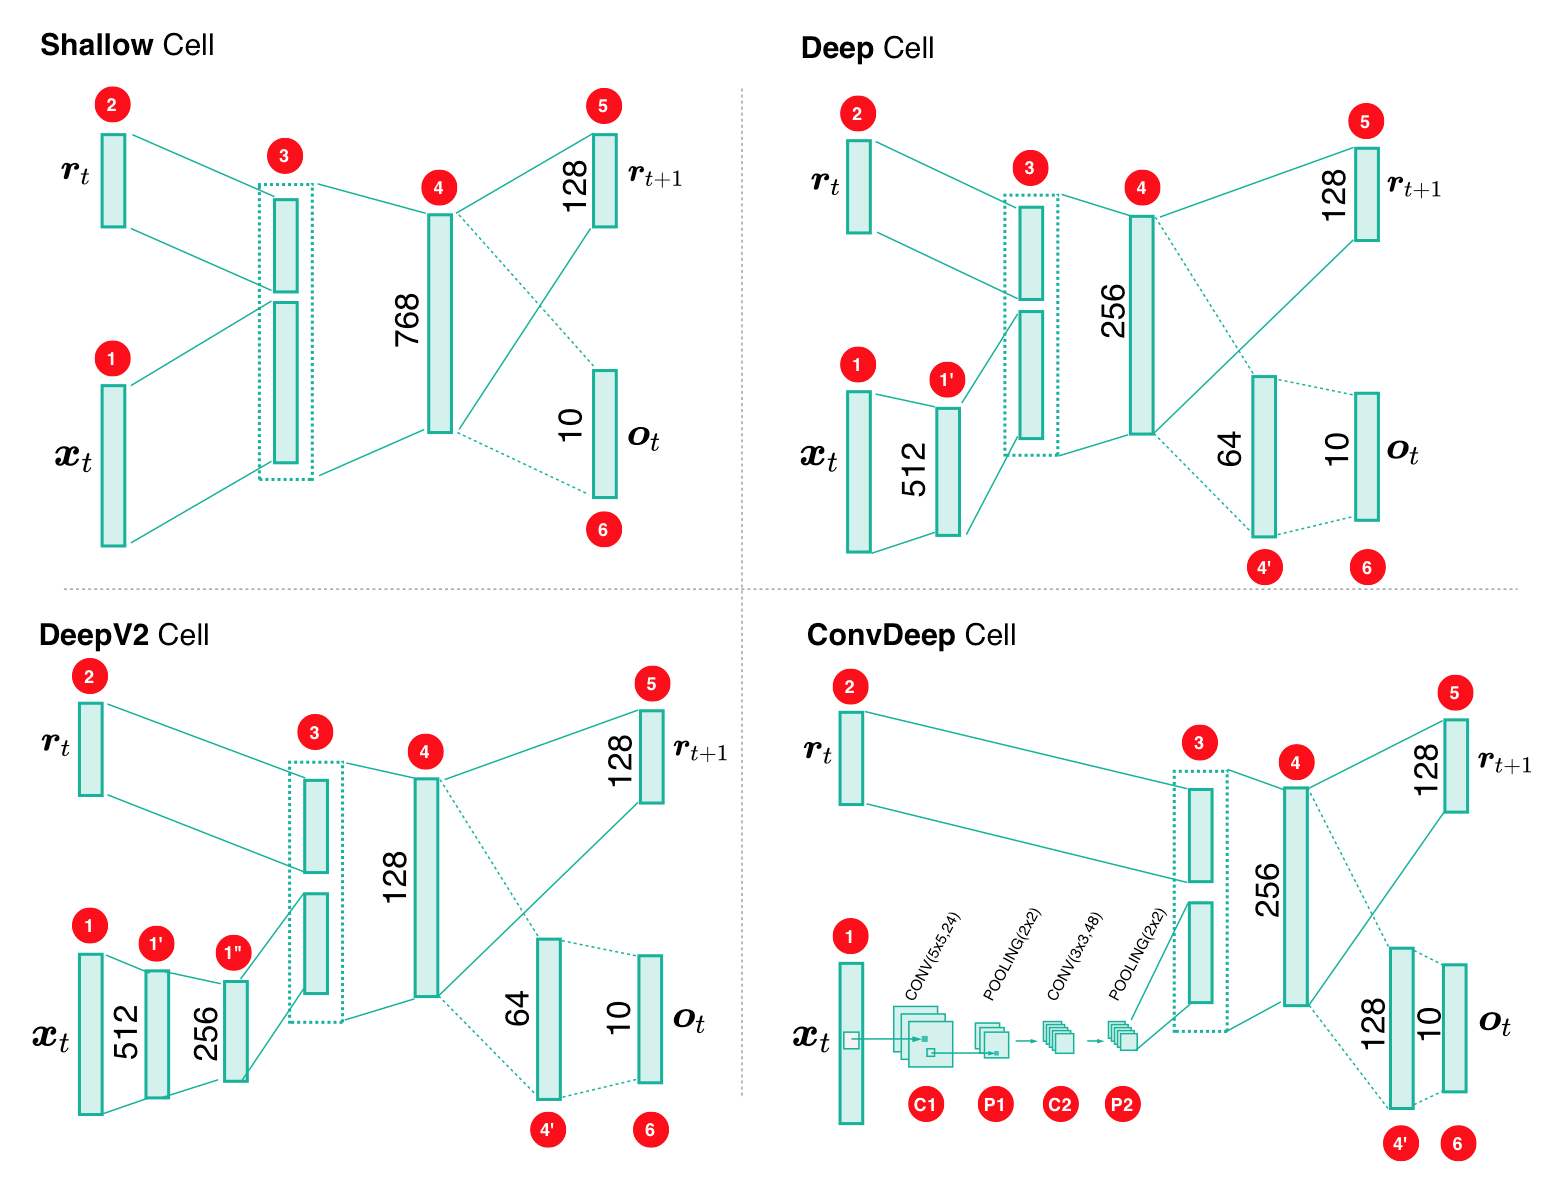

# Experiment 1 : concatenated mnists with correct class in the middle
![image.png](https://i.imgur.com/zgmxPZl.png)

## Heatmaps of MNIST

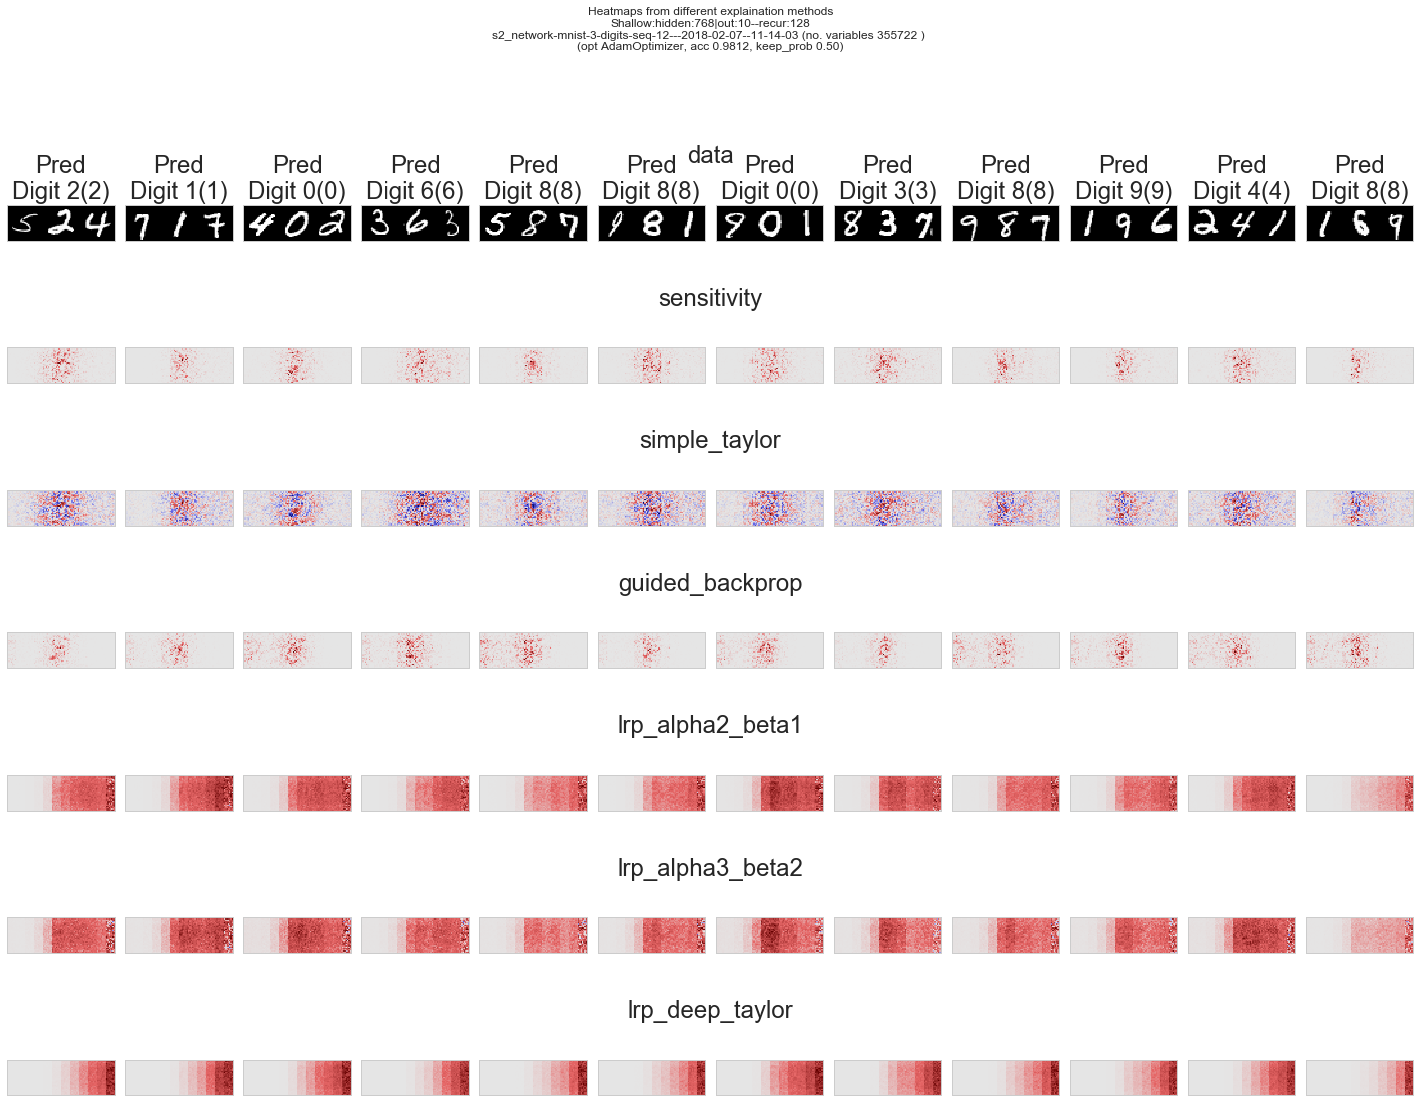

In [5]:
plot_heatmaps('shallow', 'mnist-3-digits', 12)

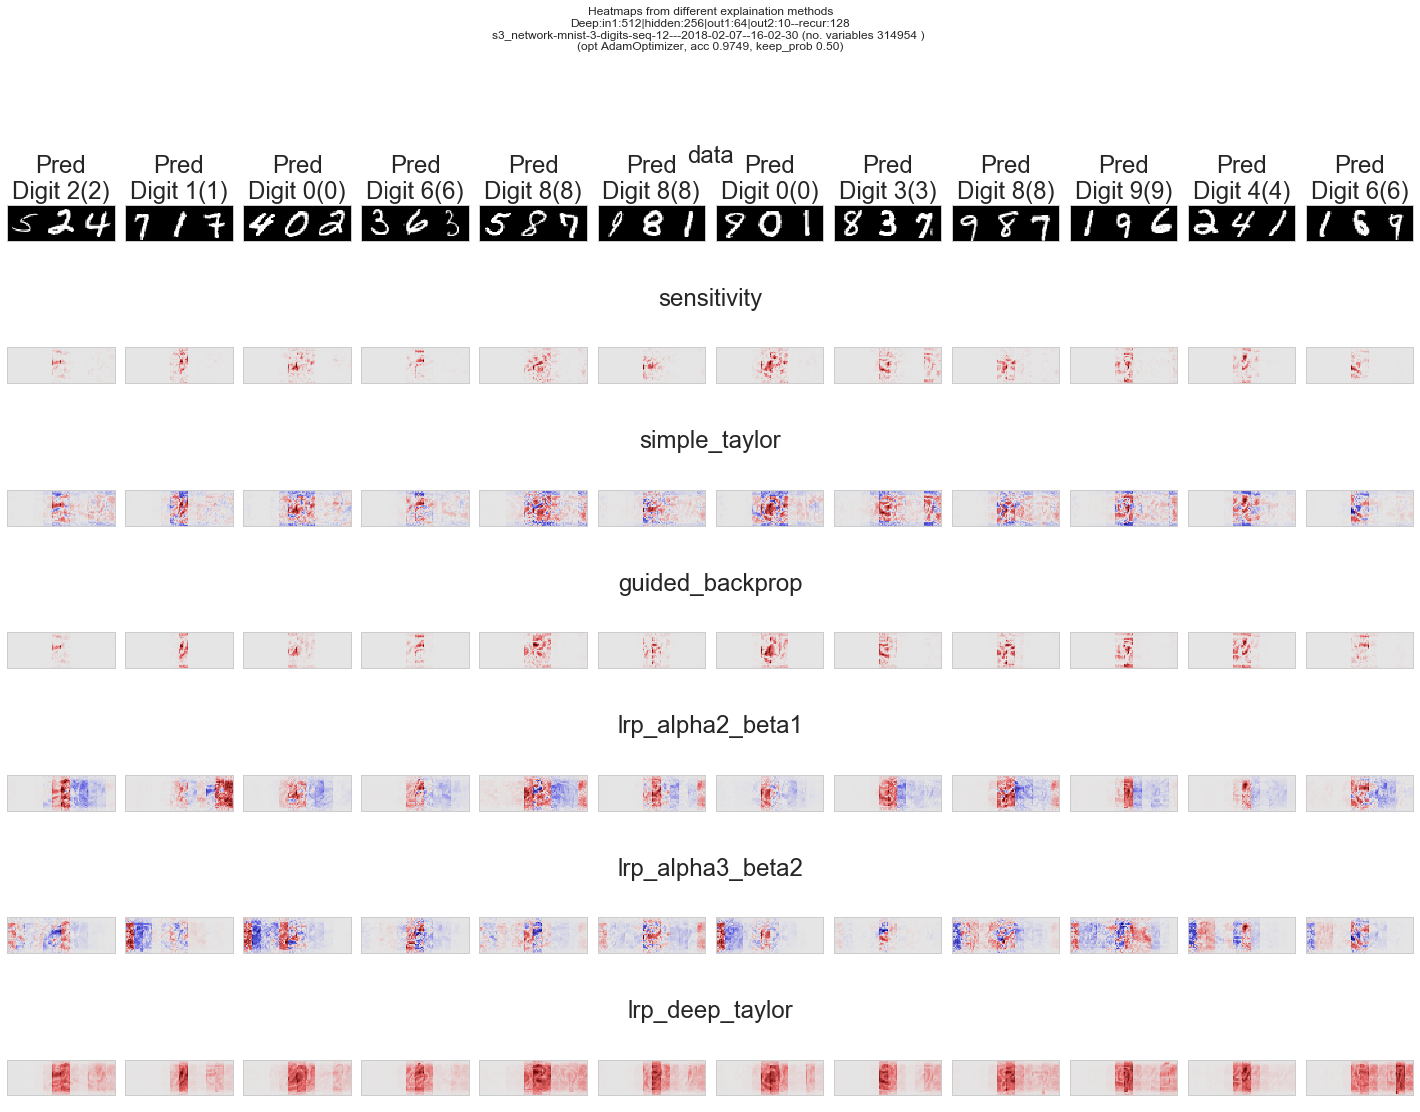

In [6]:
plot_heatmaps('deep', 'mnist-3-digits', 12)

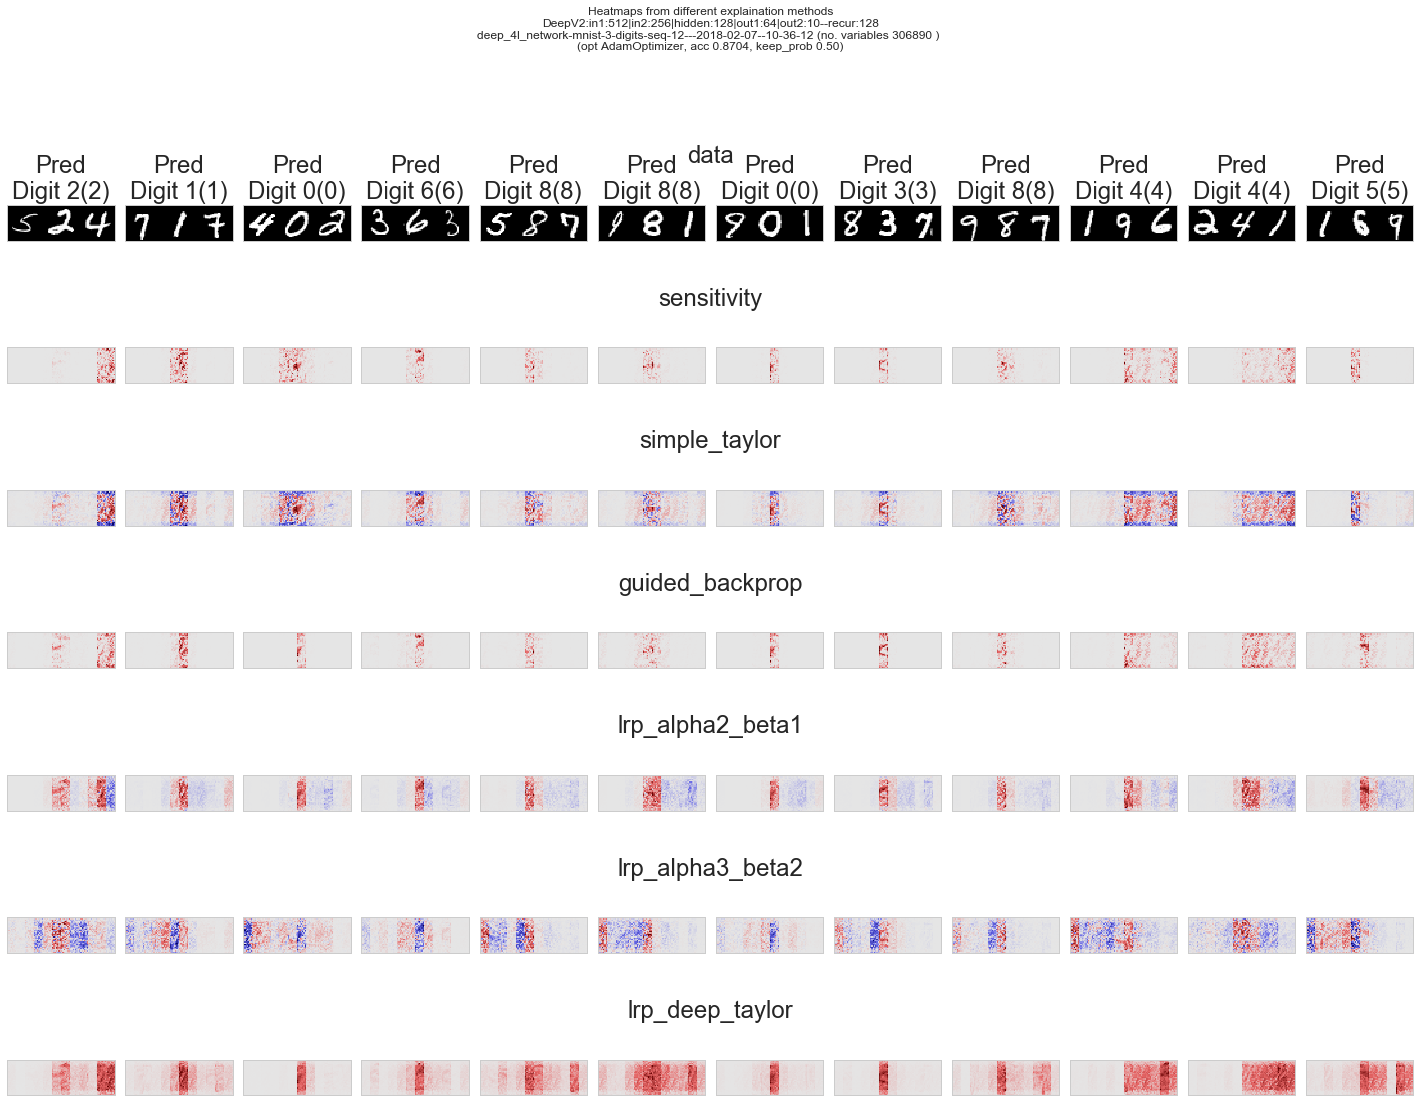

In [7]:
plot_heatmaps('deepv2', 'mnist-3-digits', 12)

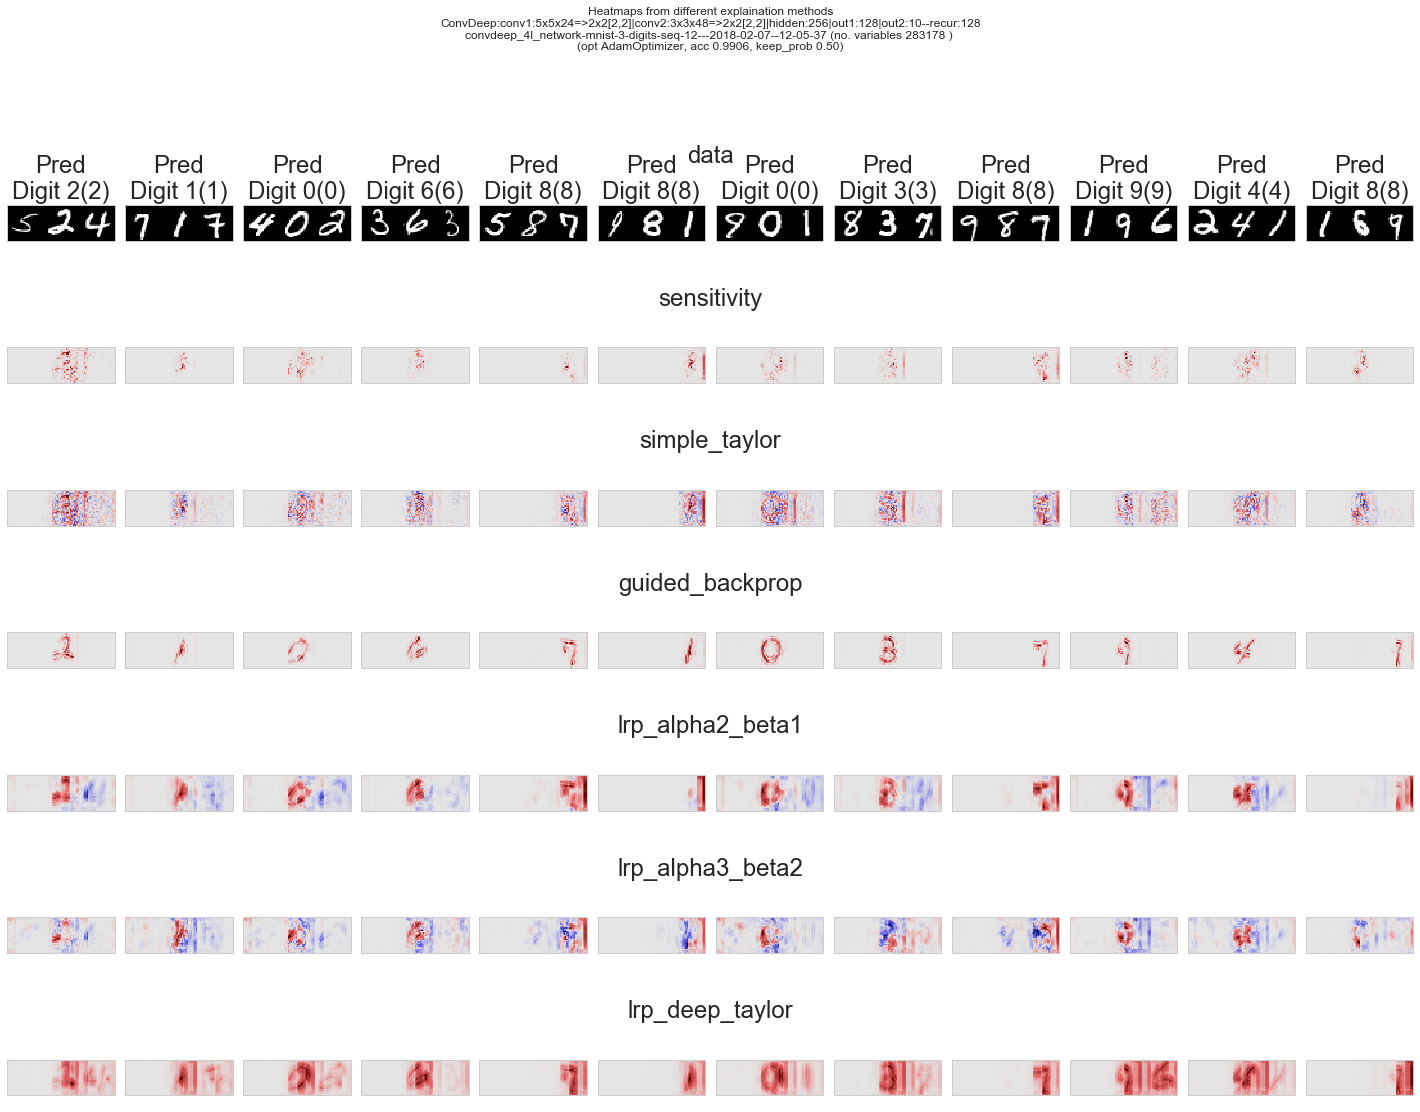

In [8]:
plot_heatmaps('convdeep', 'mnist-3-digits', 12)

## Heatmaps of FashionMNIST

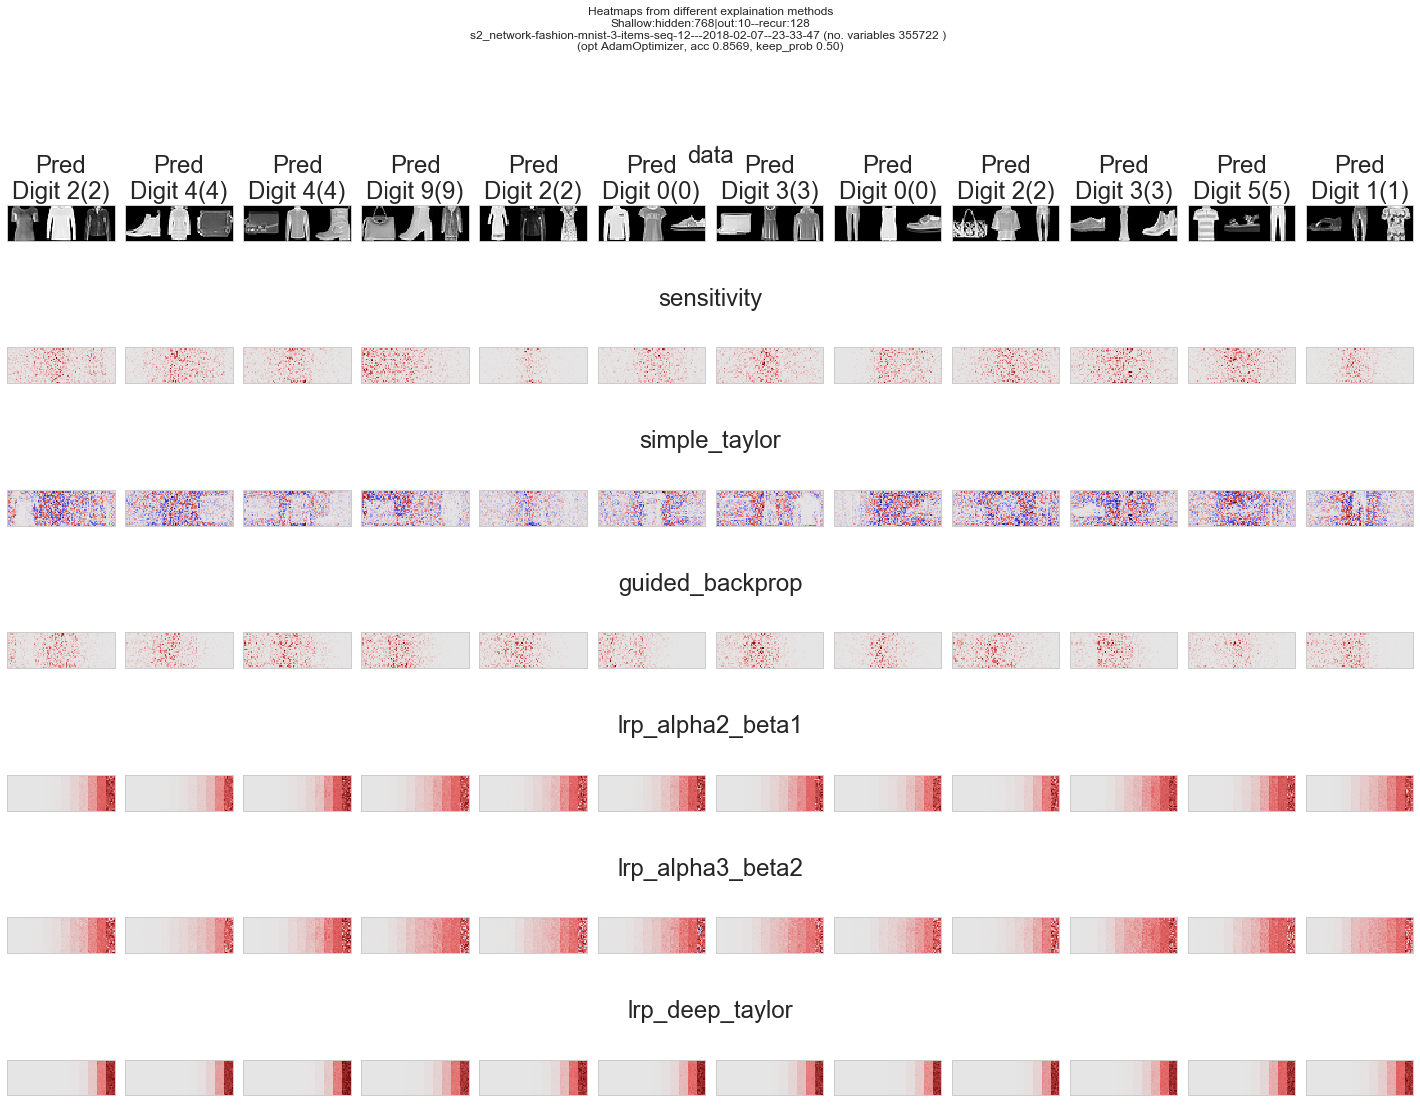

In [9]:
plot_heatmaps('shallow', 'fashion-mnist-3-items', 12)

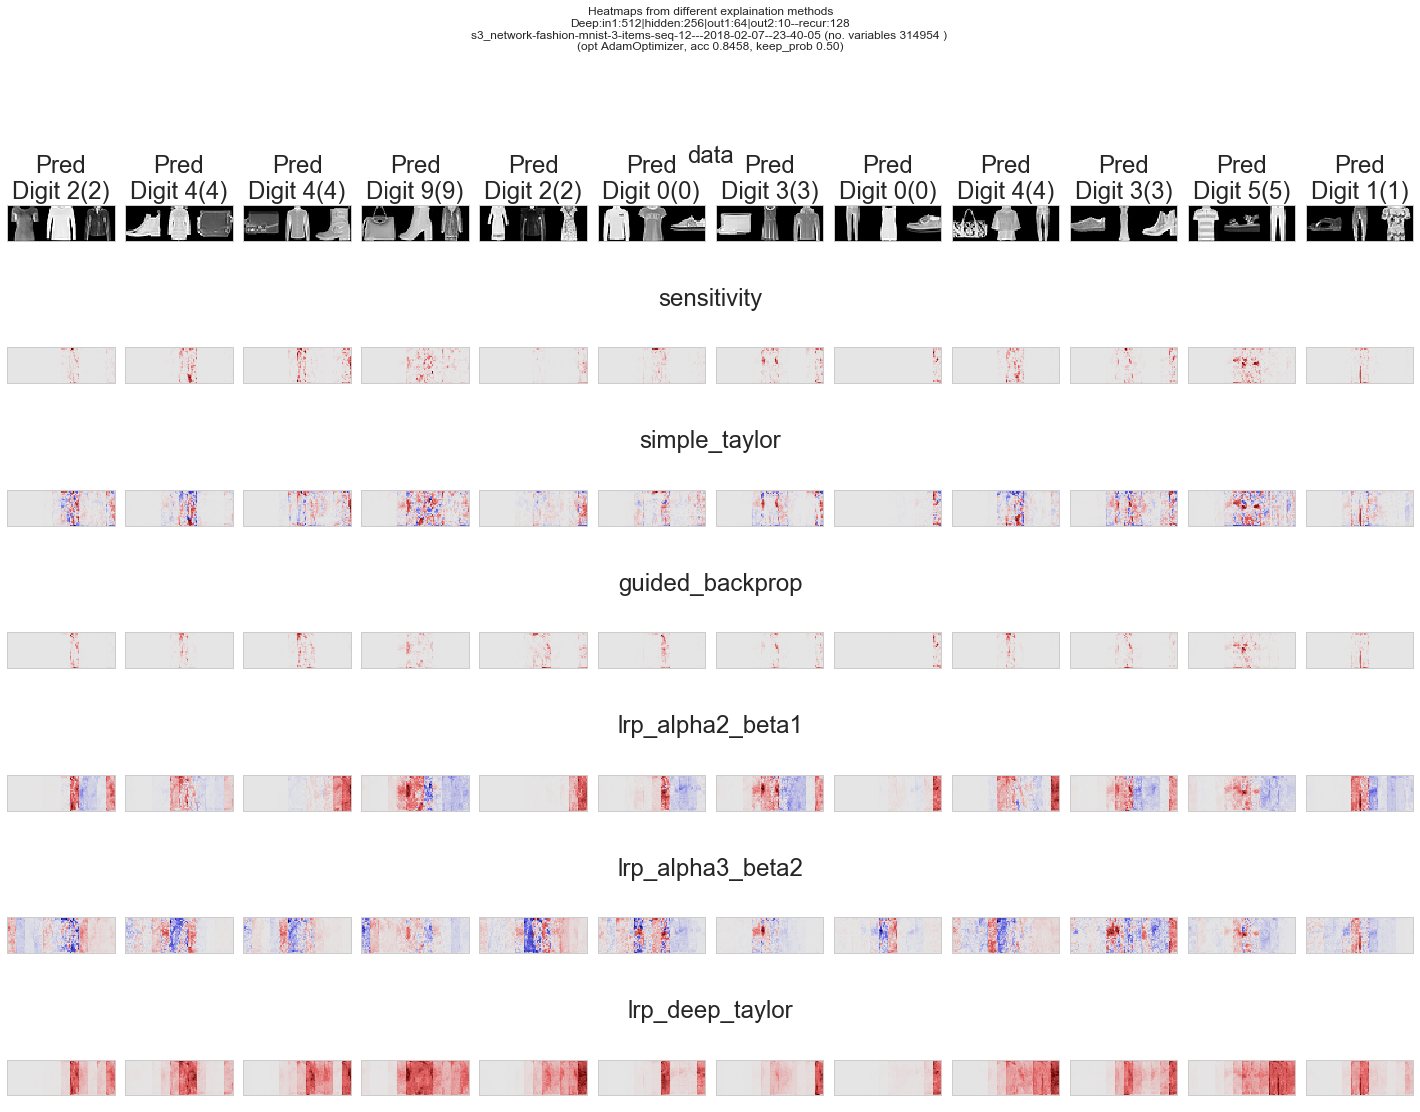

In [10]:
plot_heatmaps('deep', 'fashion-mnist-3-items', 12)

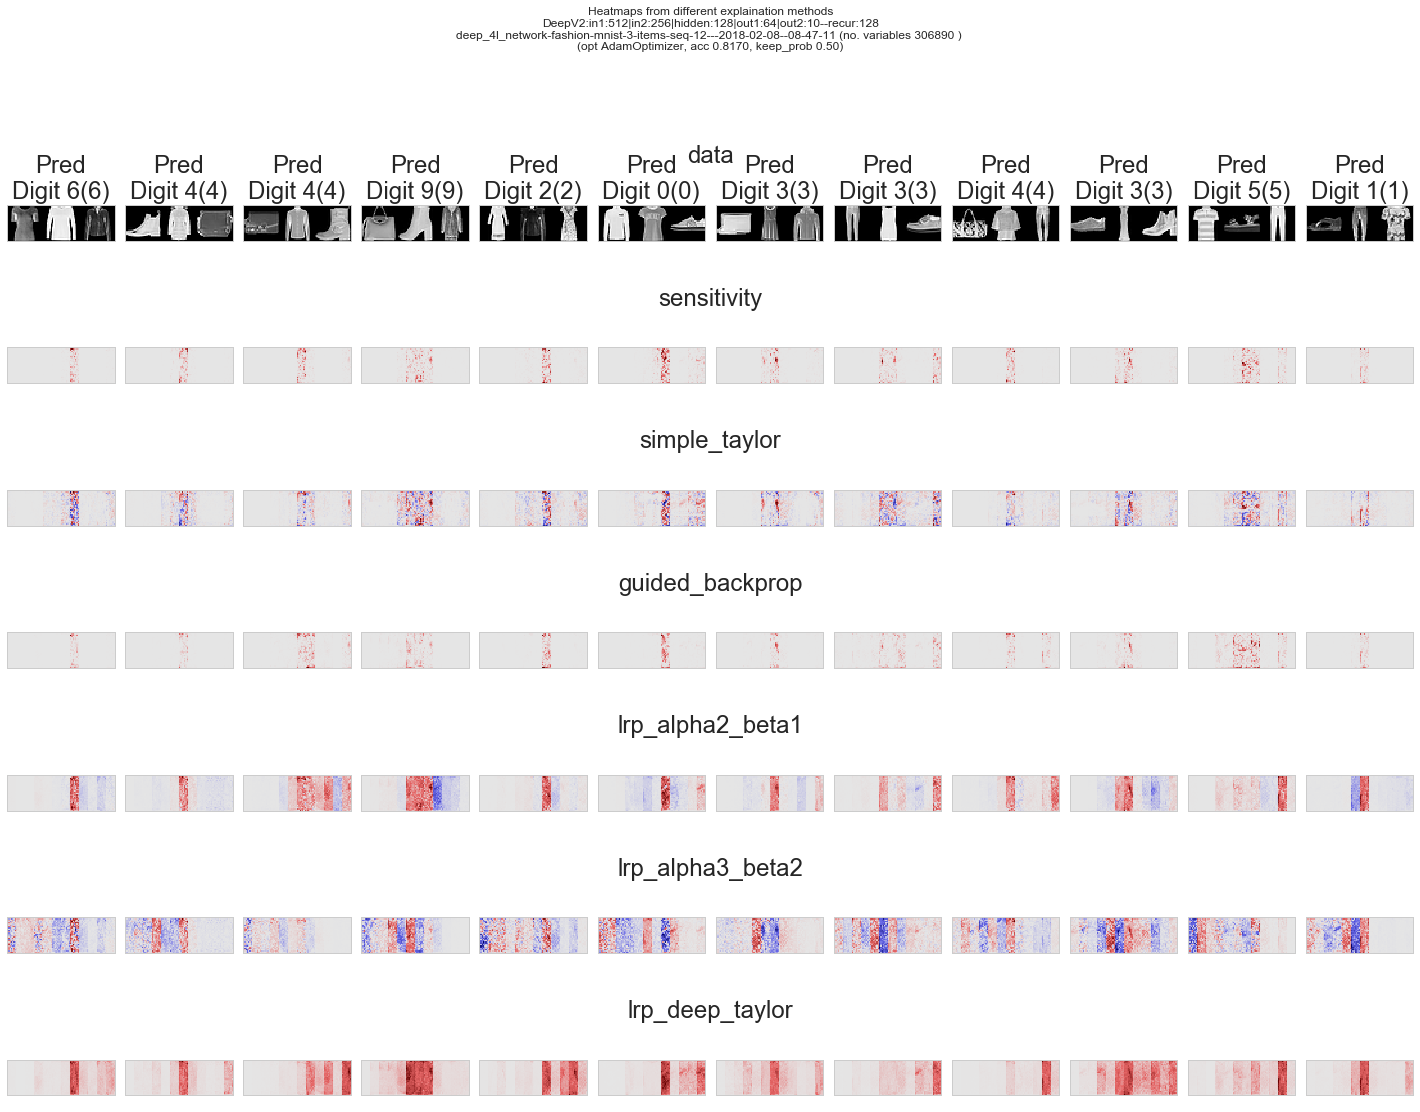

In [11]:
plot_heatmaps('deepv2', 'fashion-mnist-3-items', 12)

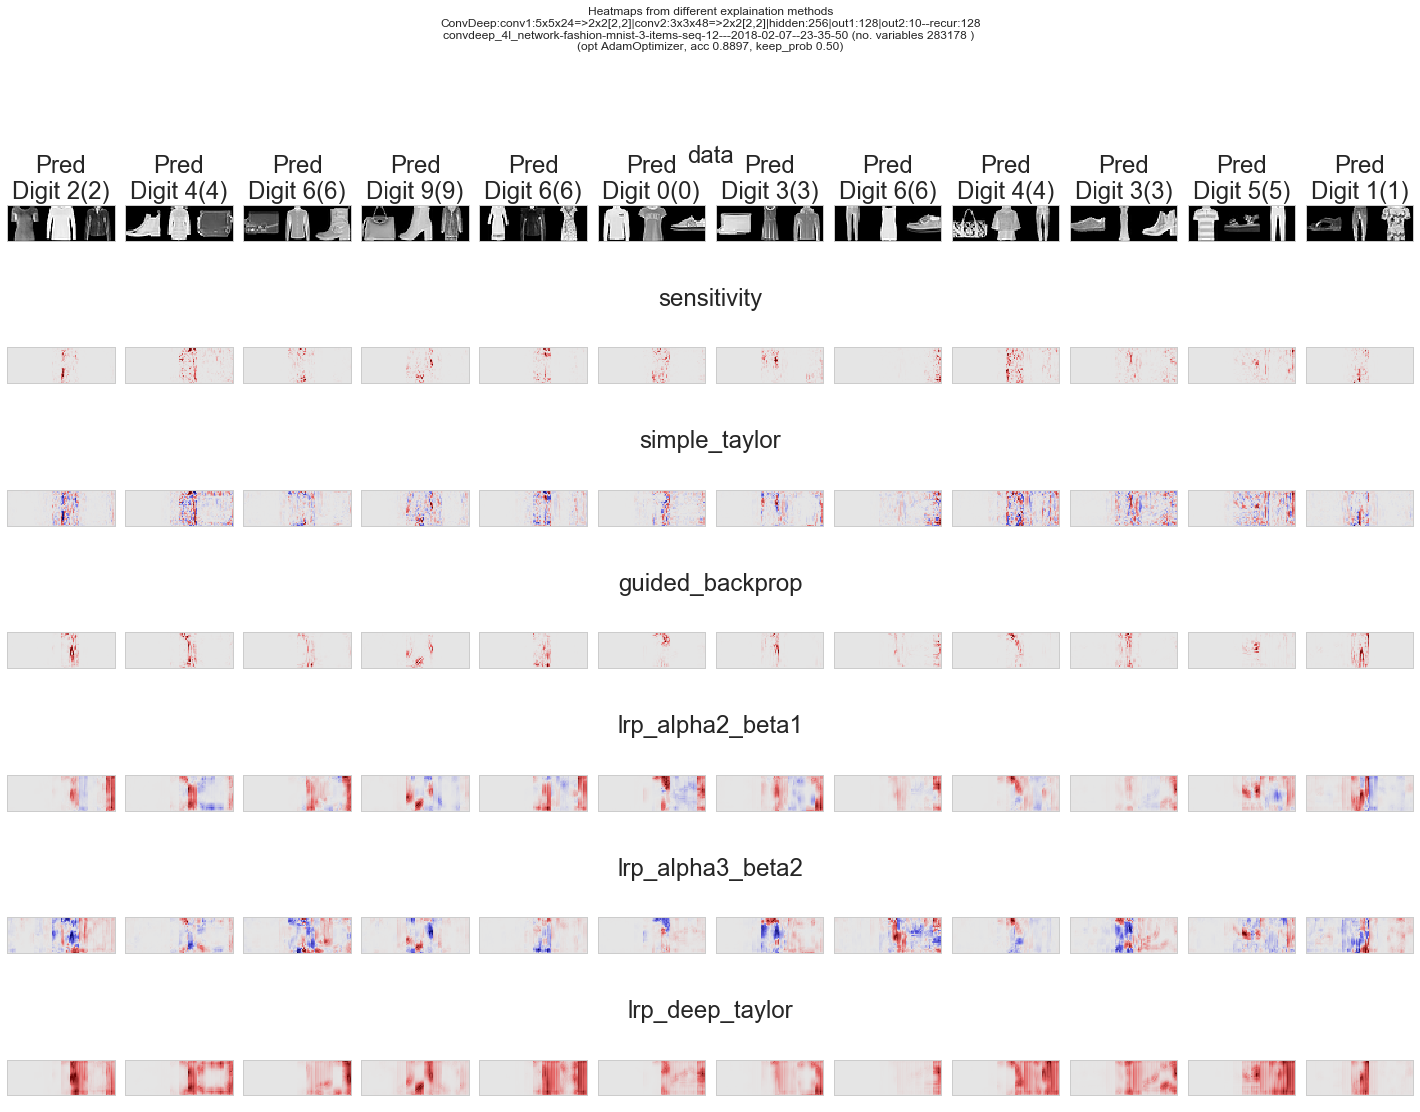

In [12]:
plot_heatmaps('convdeep', 'fashion-mnist-3-items', 12)

## Relevance Distributions

getting data from ../stats/rel-dist-mnist-3-digits.pkl
getting data from ../stats/rel-dist-fashion-mnist-3-items.pkl


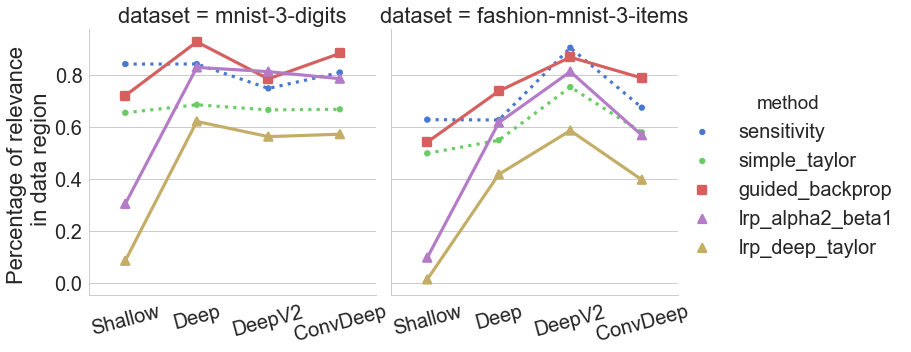

In [48]:
def plot_relevance_dist_in_middle_region(datasets=['mnist-3-digits'], methods=['sensitivity', 'simple_taylor', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor']):
    results = []
    for dataset in datasets:
        file = "../stats/rel-dist-%s.pkl" % (dataset)
        print('getting data from %s' % file)
        results = results + pickle.load(open(file, "rb"))

    df = pd.DataFrame(results)
    df = df[df.method.isin(methods)]
    
    def get_marker_linestyle(method):
        if method == 'guided_backprop':
            mk = 's'
            ls = '-'
        elif 'lrp' in method:
            mk = '^'
            ls = '-'
        else:
            mk = '.'
            ls =':'
        return mk, ls
    marker_linestyles = [get_marker_linestyle(m) for m in methods]
    markers = [ m[0] for m in marker_linestyles ]
    linestyles = [ m[1] for m in marker_linestyles ]
    df['architecture_idx'] = df['architecture'].apply(plot.architecture_idx)

    col_name = 'Percentage of relevance \n in data region'
    df[col_name] = df['rel_dist_in_data_region']

    g = sns.factorplot(x="architecture_idx", y=col_name, col='dataset', hue="method",
                       data=df, size=5, markers=markers,
                       linestyles=linestyles)

    g.set_xticklabels(['Shallow', 'Deep', 'DeepV2', 'ConvDeep'], rotation=15)
    g.set(xlabel='')
    
plot_relevance_dist_in_middle_region(['mnist-3-digits', 'fashion-mnist-3-items'])

plt.savefig('rel-dist-3digits.pdf')

## Model Accuracy

In [43]:
plot.show_model_accuracy('mnist-3-digits', seqs=[12])

mnist-3-digits accuracy


seq  Shallow    Deep  DeepV2  ConvDeep
0   12   0.9812  0.9749  0.8704    0.9906

In [42]:
plot.show_model_accuracy('fashion-mnist-3-items', seqs=[12])

fashion-mnist-3-items accuracy


seq  Shallow    Deep  DeepV2  ConvDeep
0   12   0.8569  0.8458   0.817    0.8897

# Experiment 2 :  concatenated mnists with correct class having 2 digits
![](https://i.imgur.com/RMk0gQN.png)

## Heatmaps of MNIST

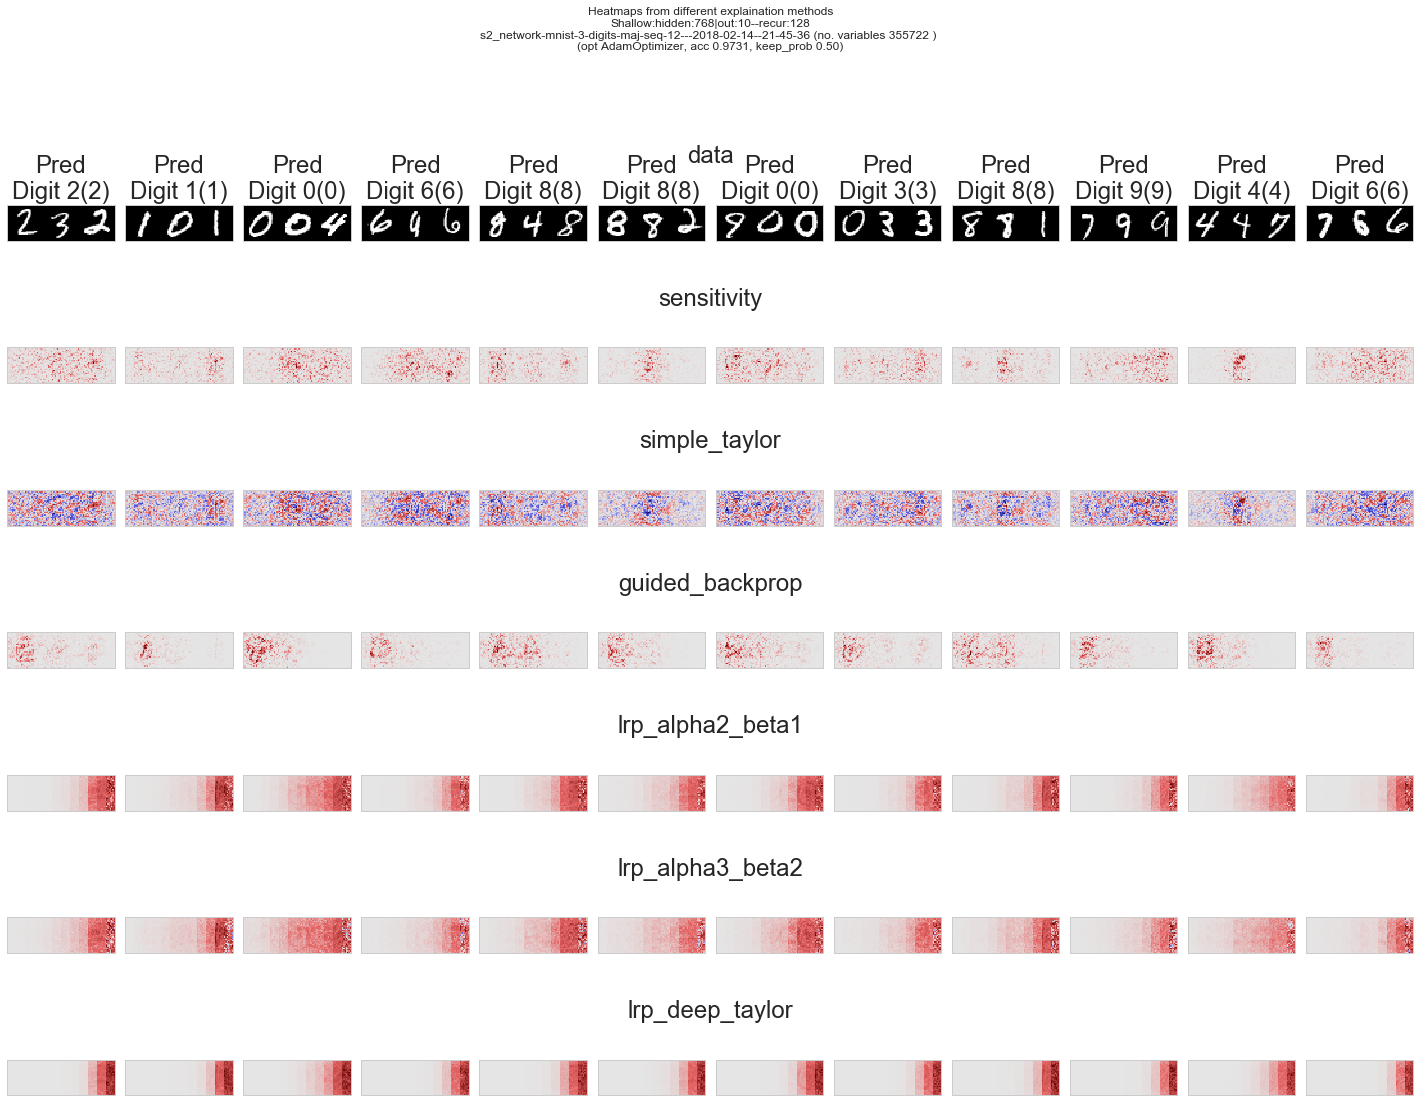

In [16]:
plot_heatmaps('shallow', 'mnist-3-digits-maj', 12)

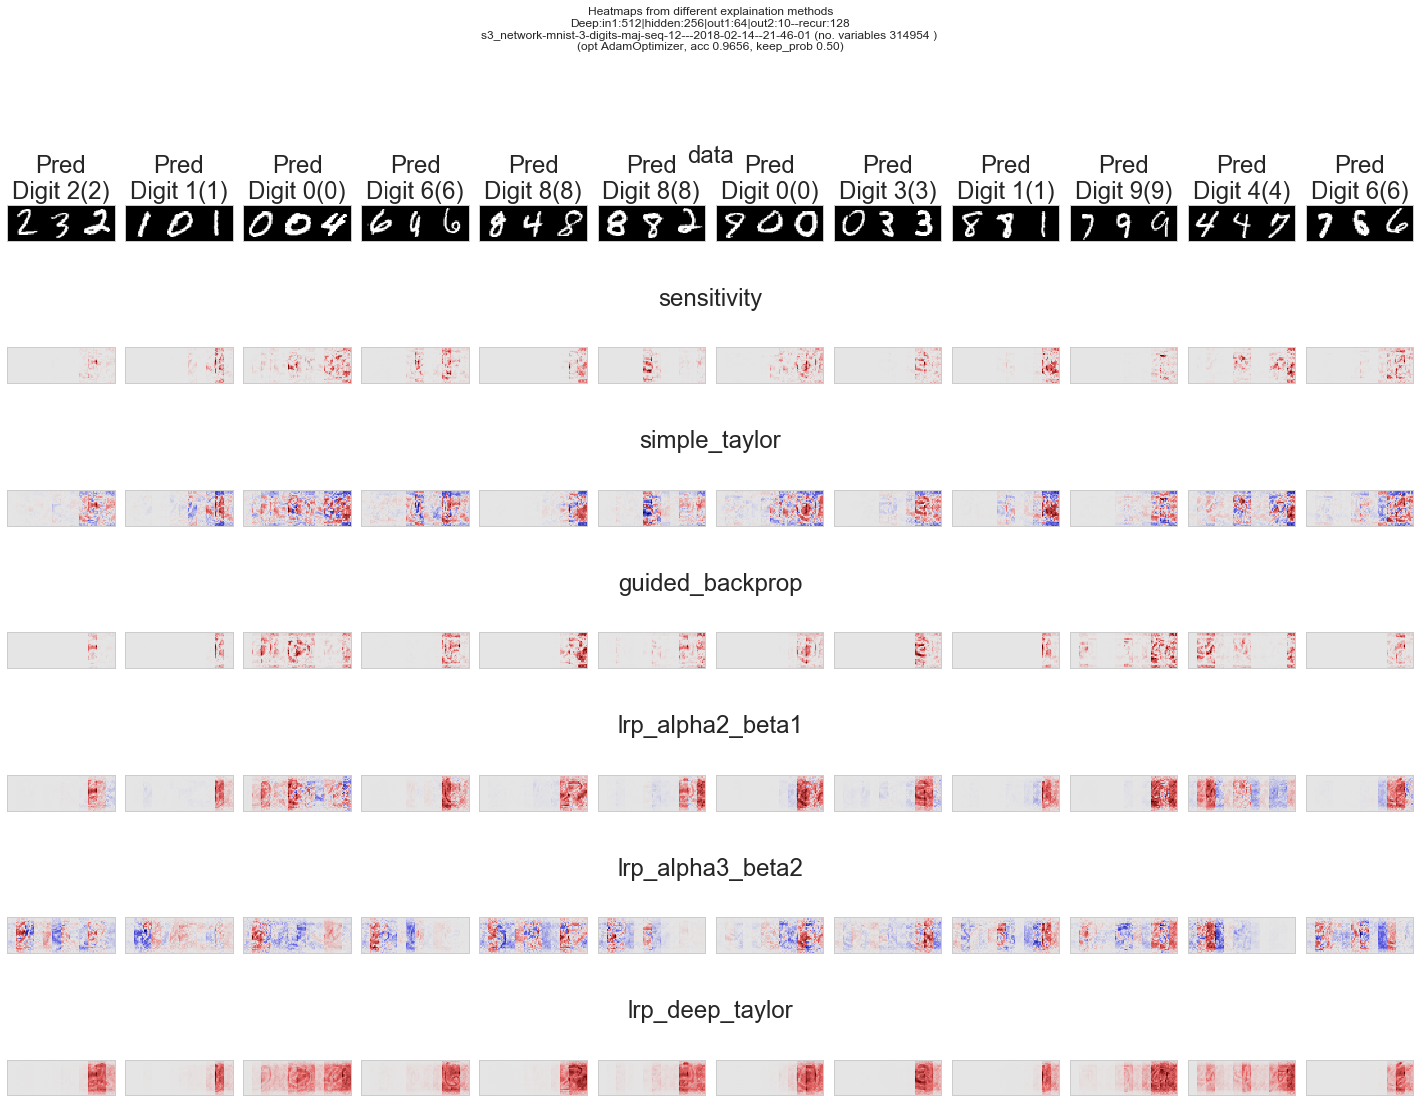

In [17]:
plot_heatmaps('deep', 'mnist-3-digits-maj', 12)

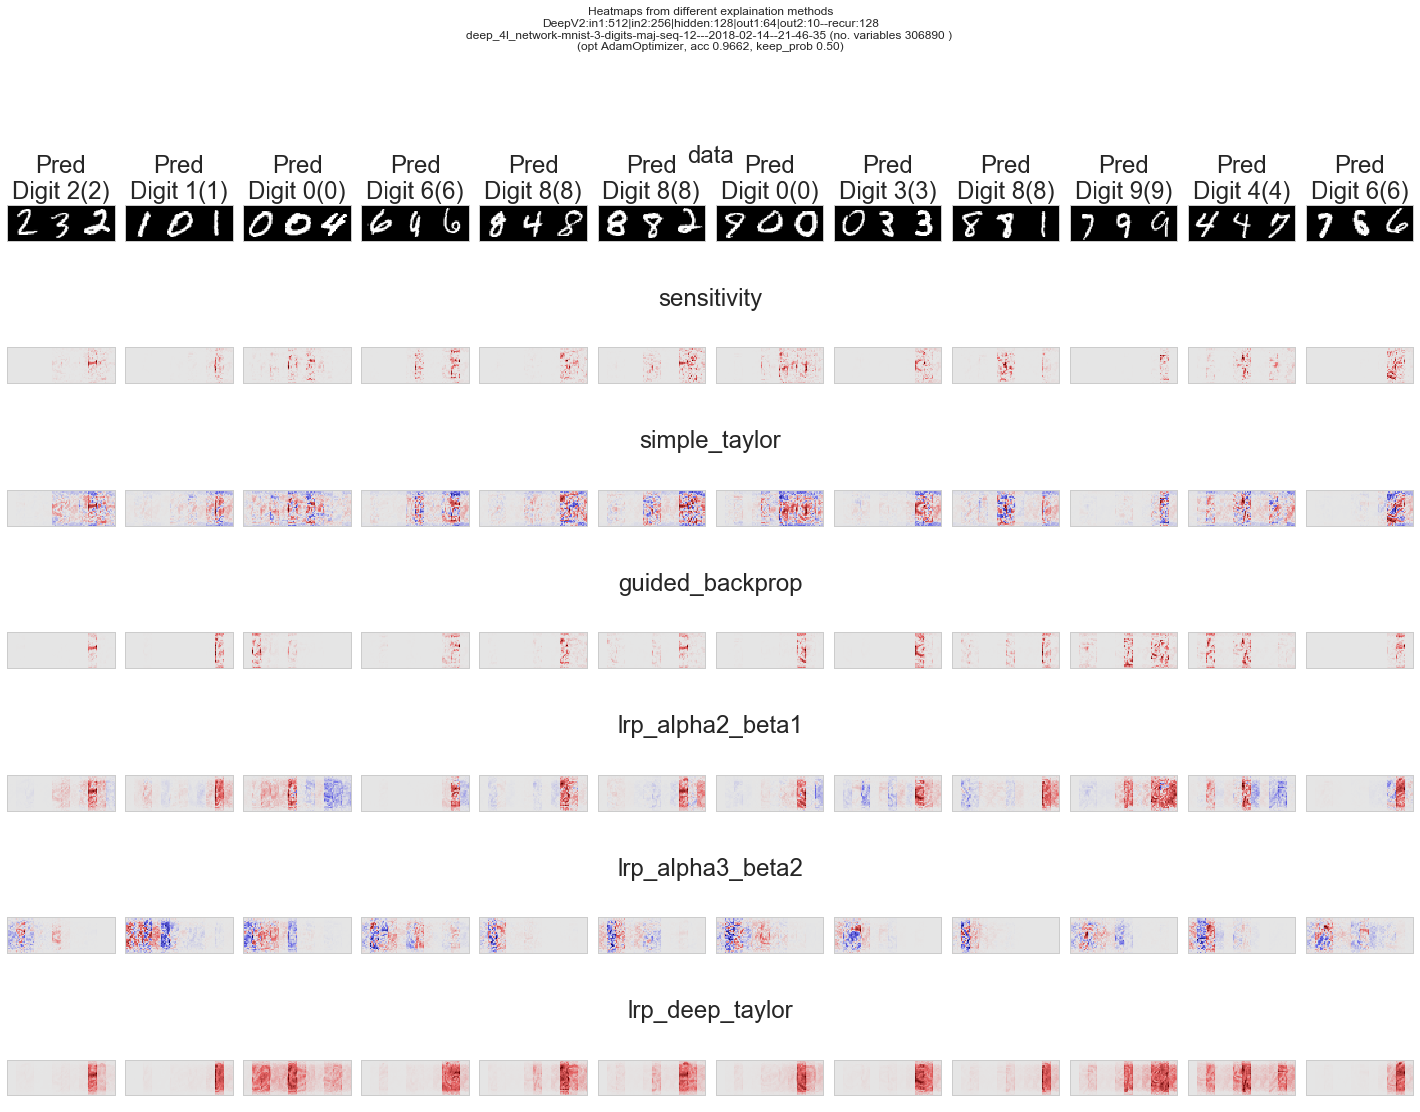

In [18]:
plot_heatmaps('deepv2', 'mnist-3-digits-maj', 12)

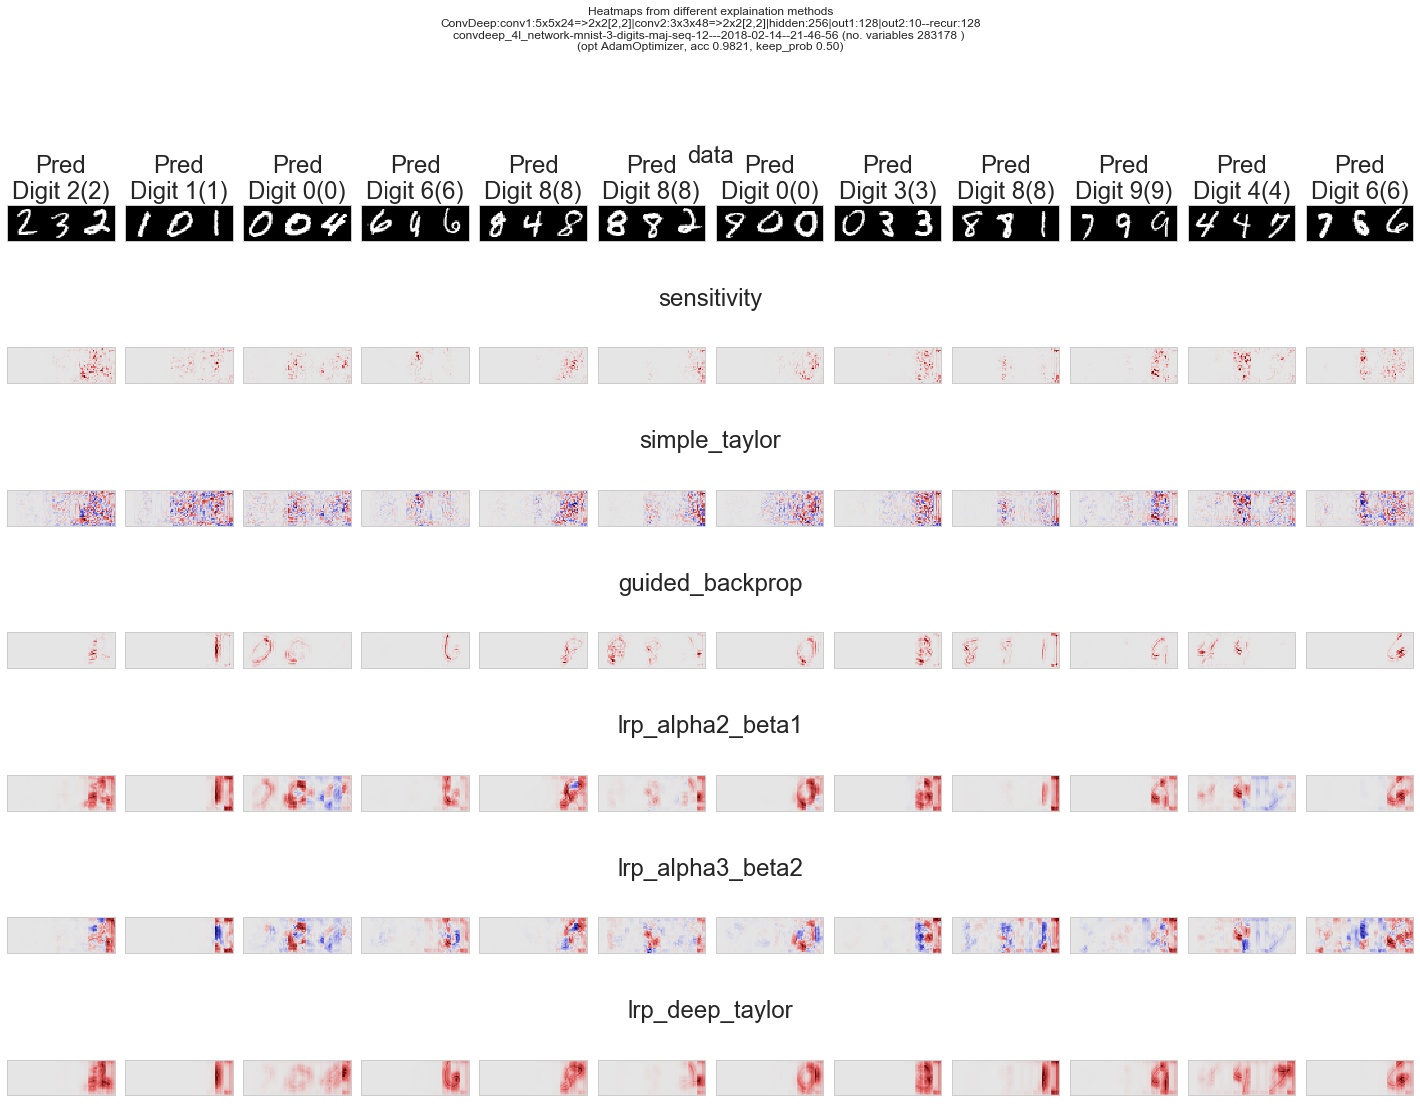

In [19]:
plot_heatmaps('convdeep', 'mnist-3-digits-maj', 12)

## Heatmaps of FashionMNIST

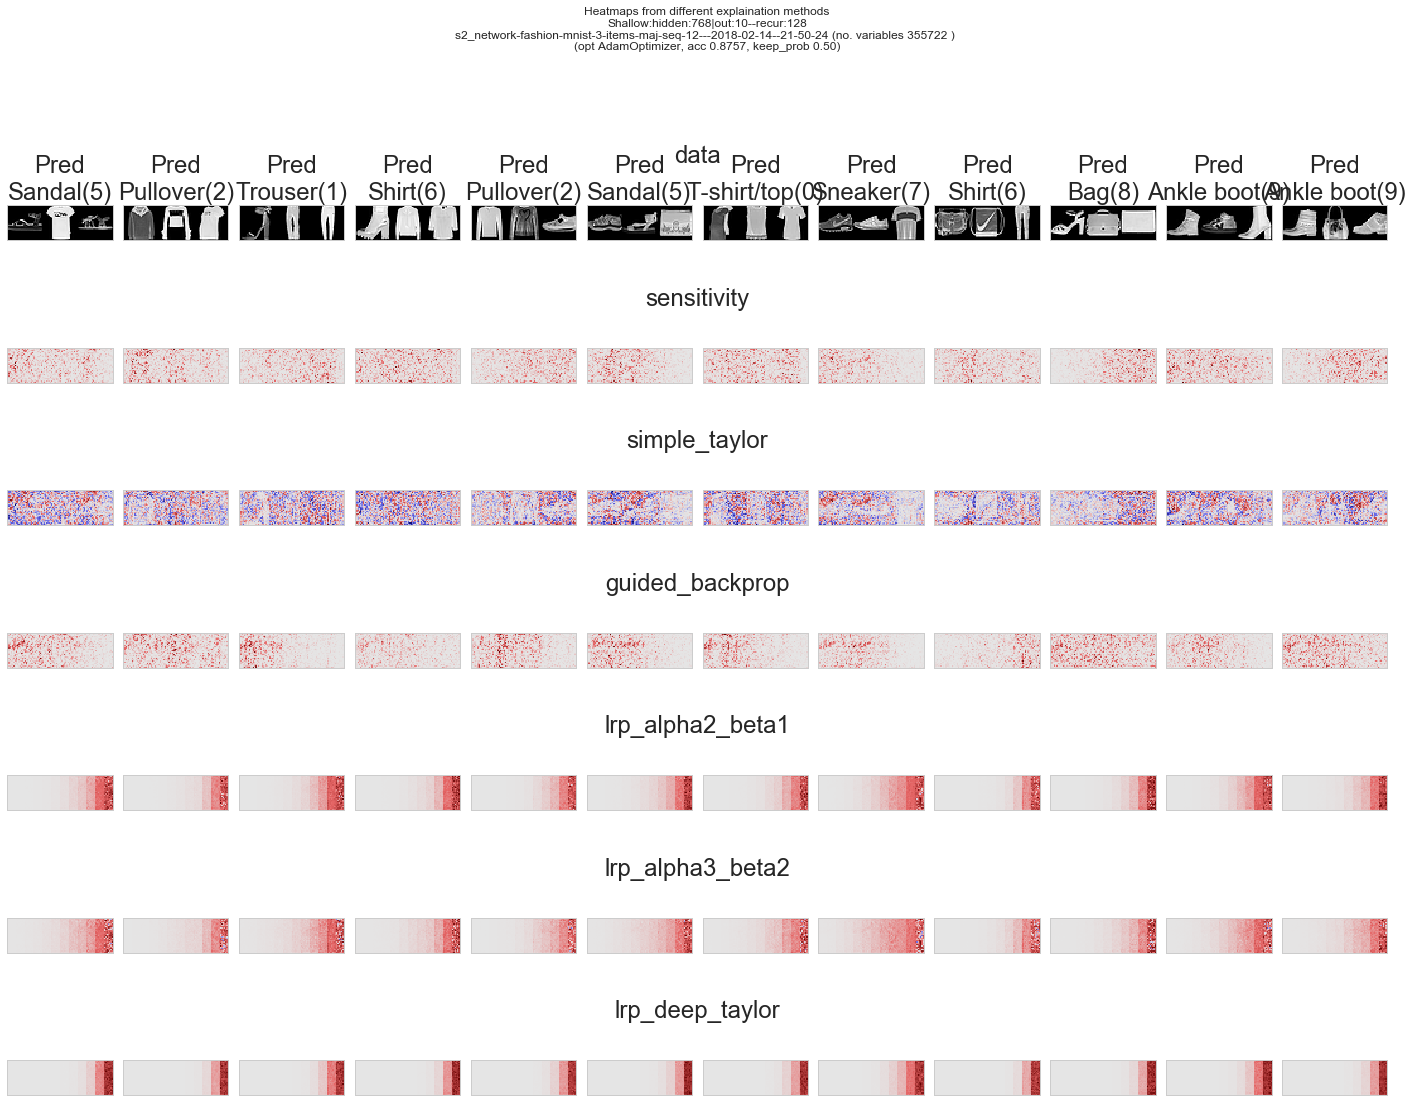

In [20]:
plot_heatmaps('shallow', 'fashion-mnist-3-items-maj', 12)

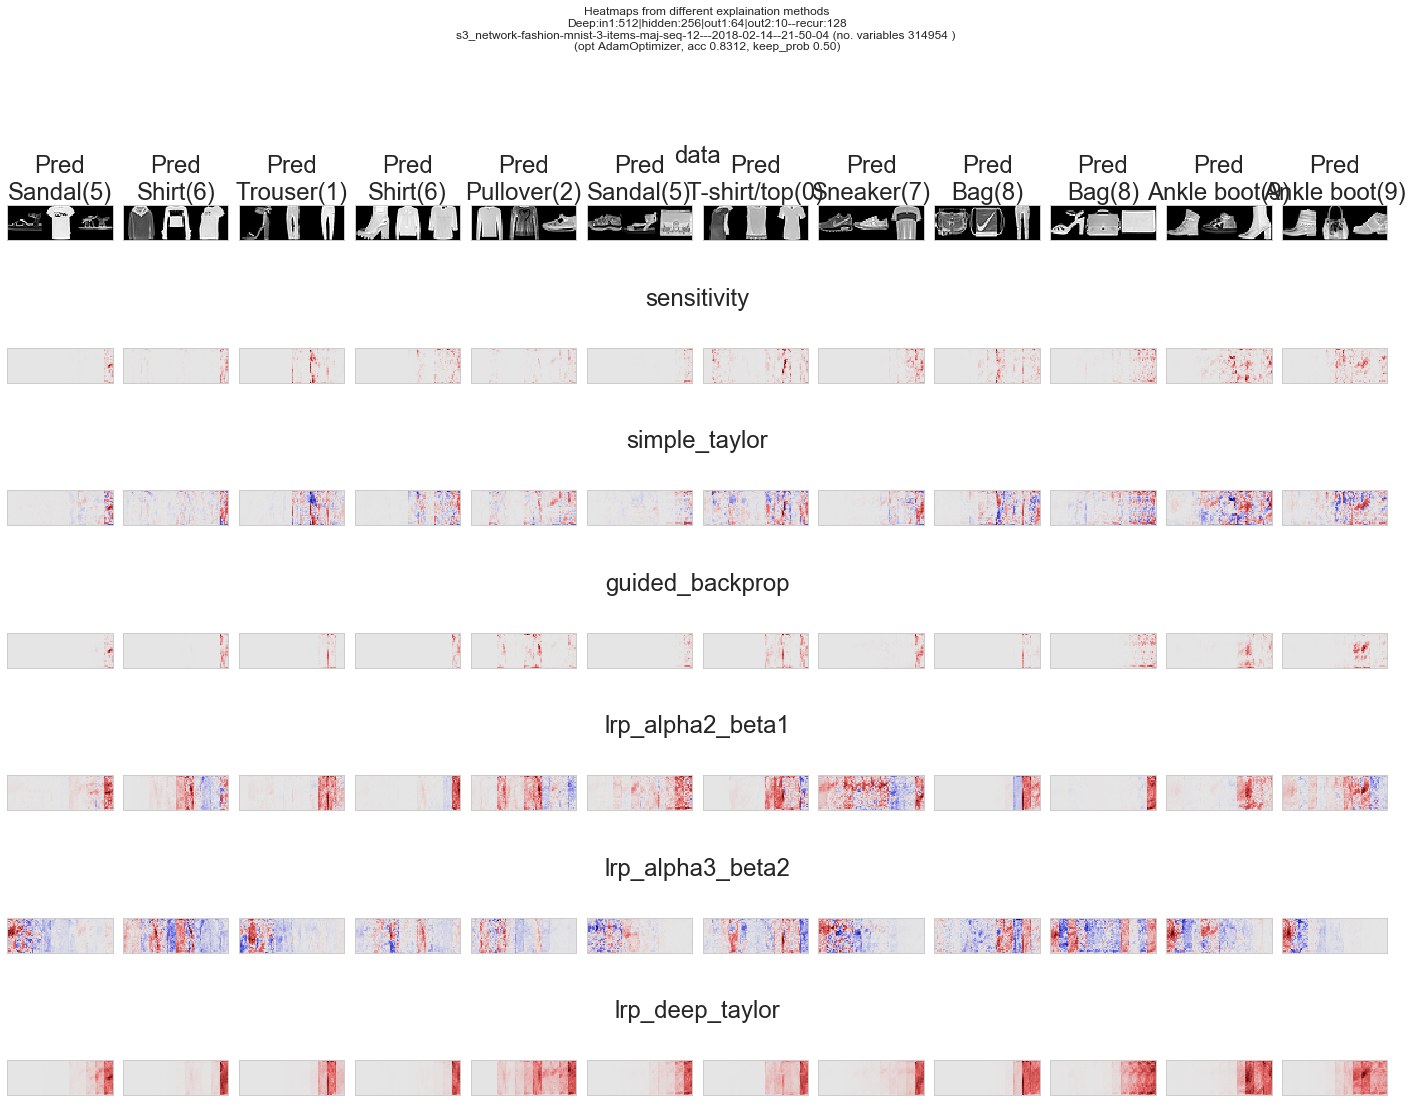

In [21]:
plot_heatmaps('deep', 'fashion-mnist-3-items-maj', 12)

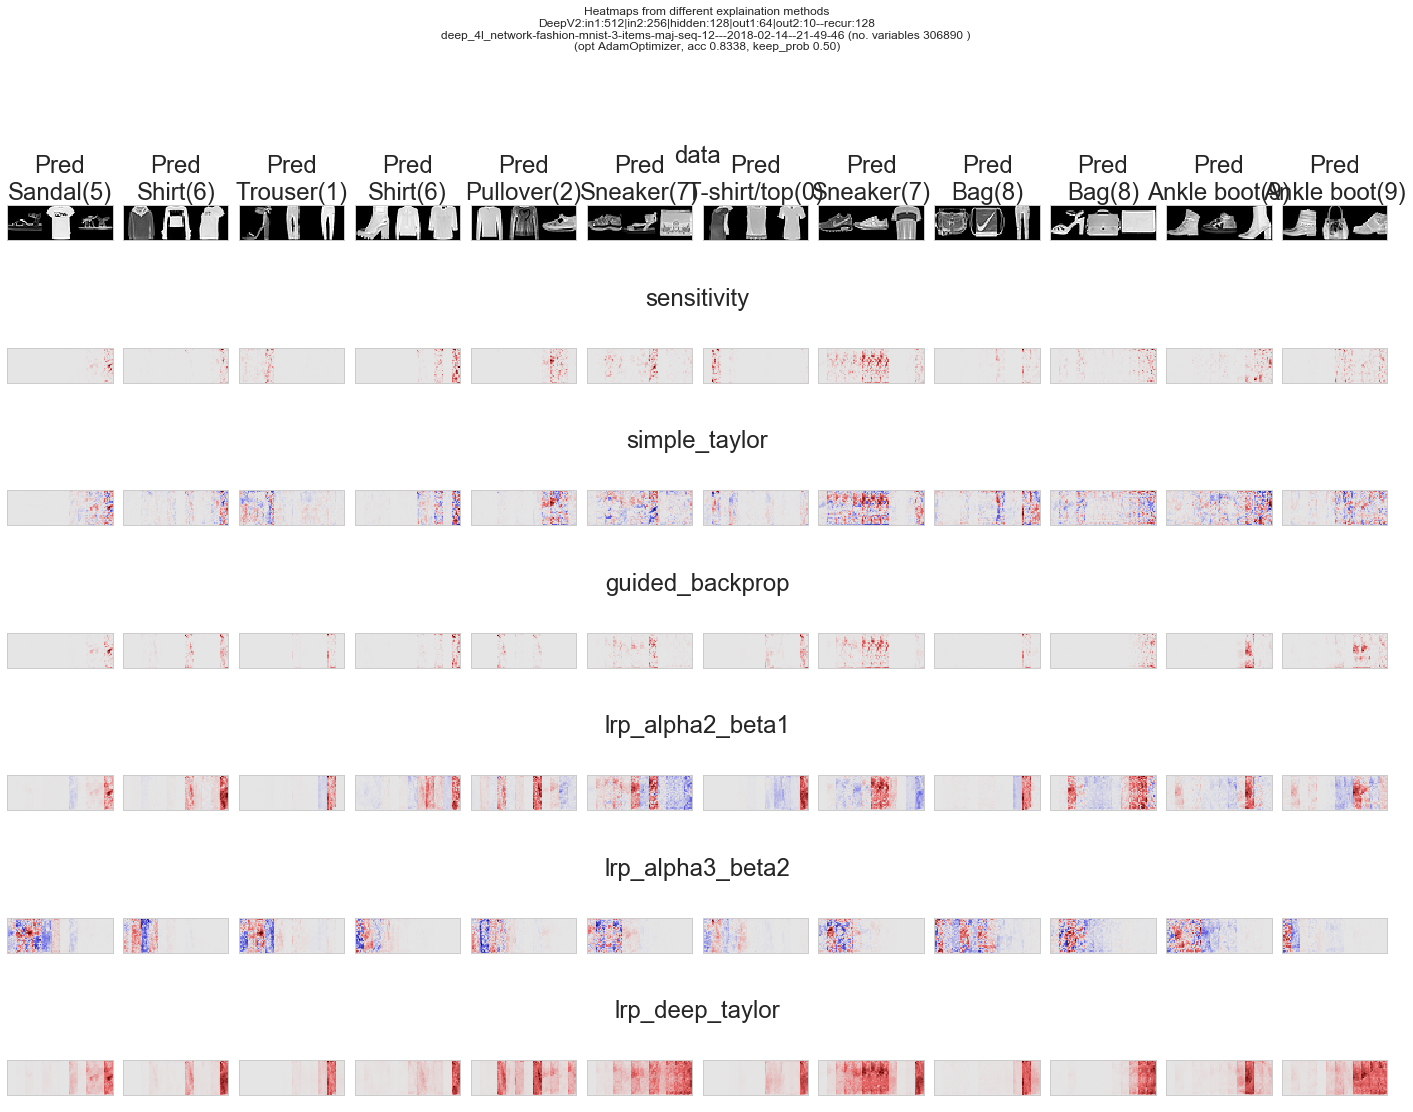

In [22]:
plot_heatmaps('deepv2', 'fashion-mnist-3-items-maj', 12)

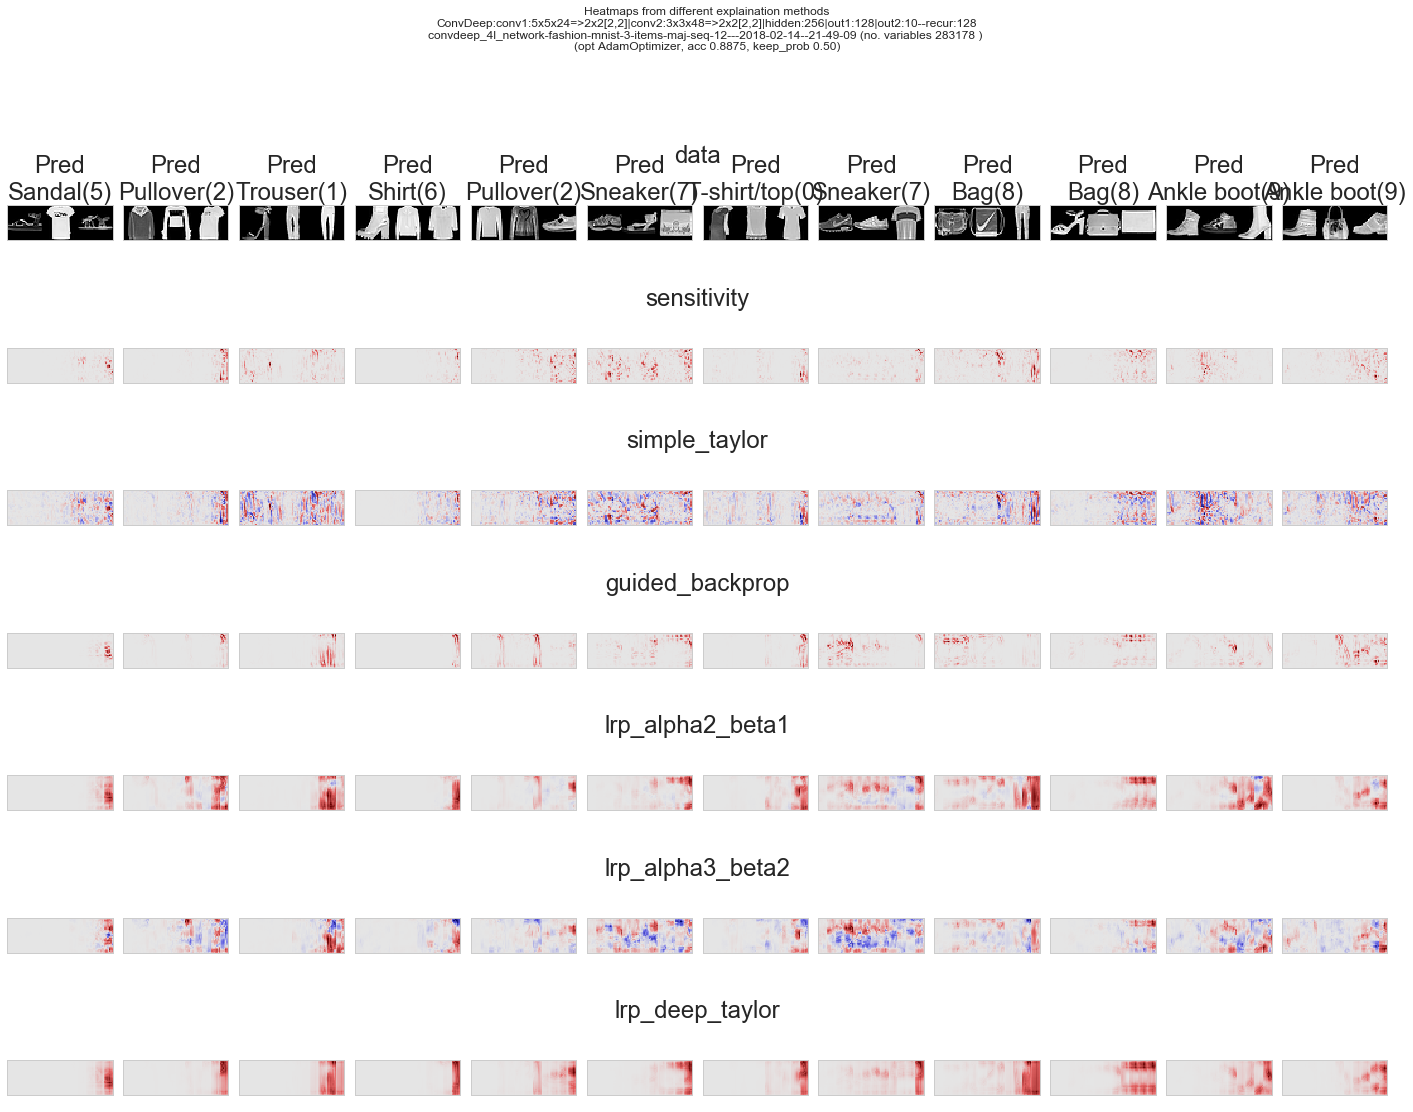

In [23]:
plot_heatmaps('convdeep', 'fashion-mnist-3-items-maj', 12)

## Relevance Distributions

getting data from ../stats/rel-dist-mnist-3-digits-maj.pkl
getting data from ../stats/rel-dist-fashion-mnist-3-items-maj.pkl


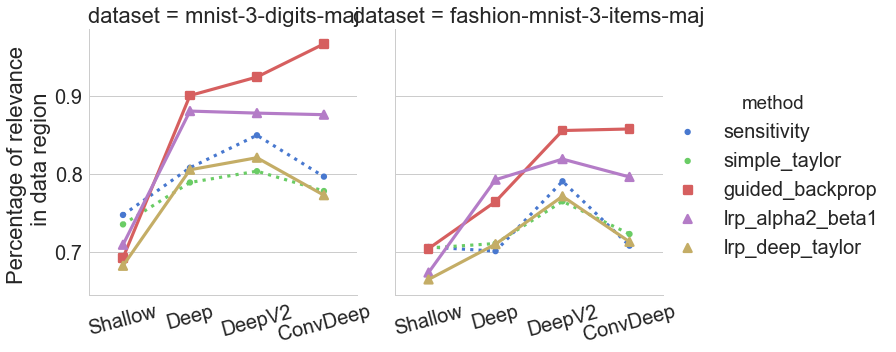

In [47]:
plot_relevance_dist_in_middle_region(['mnist-3-digits-maj', 'fashion-mnist-3-items-maj'])

# plt.savefig('rel-dist-3digits-maj.pdf')

## Model Accuracy

In [44]:
plot.show_model_accuracy('mnist-3-digits-maj', seqs=[12])

mnist-3-digits-maj accuracy


seq  Shallow    Deep  DeepV2  ConvDeep
0   12   0.9731  0.9656  0.9662    0.9821

In [45]:
plot.show_model_accuracy('fashion-mnist-3-items-maj', seqs=[12])

fashion-mnist-3-items-maj accuracy


seq  Shallow    Deep  DeepV2  ConvDeep
0   12   0.8757  0.8312  0.8338    0.8875